<a href="https://colab.research.google.com/github/lucaCosca/JetNet_ML-Final-Project/blob/main/JetNet_DeepNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import gdown

Y_link = "https://drive.google.com/uc?id=1P4SYbafssKz-6oPXjqTD7aBiCawQjHEk"
X_link = "https://drive.google.com/uc?id=1S_QInod3zyO8Vj-YGQfuM1eVPnwiIeRX"
Y_name = "Y01_with_mass.npz"
X_name = "X01.npz"

gdown.download(Y_link, Y_name, quiet=False)
gdown.download(X_link, X_name, quiet=False)

Y_Data = np.load('Y01_with_mass.npz')['arr_0'][:,0]
X_Data = np.load('X01.npz')['arr_0']

data_args={"jet_type": ["g", "q", "t", "w", "z"]}

Downloading...
From: https://drive.google.com/uc?id=1P4SYbafssKz-6oPXjqTD7aBiCawQjHEk
To: /content/Y01_with_mass.npz
100%|██████████| 1.12M/1.12M [00:00<00:00, 80.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1S_QInod3zyO8Vj-YGQfuM1eVPnwiIeRX
From (redirected): https://drive.google.com/uc?id=1S_QInod3zyO8Vj-YGQfuM1eVPnwiIeRX&confirm=t&uuid=2378272f-fed3-4269-a25a-a164a4f628a9
To: /content/X01.npz
100%|██████████| 1.40G/1.40G [00:21<00:00, 63.7MB/s]


In [2]:
# data split
num_images = X_Data.shape[0]
train_end = int(0.6 * num_images)
test_end = train_end + int(0.2 * num_images)

X_train, X_test, X_val = X_Data[:train_end], X_Data[train_end:test_end], X_Data[test_end:]
Y_train, Y_test, Y_val = Y_Data[:train_end], Y_Data[train_end:test_end], Y_Data[test_end:]

from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)
Y_train_onehot = one_hot_encoder.fit_transform(Y_train.reshape((-1,1)))
Y_valid_onehot = one_hot_encoder.fit_transform(Y_val.reshape((-1,1)))
Y_test_onehot = one_hot_encoder.fit_transform(Y_test.reshape((-1,1)))


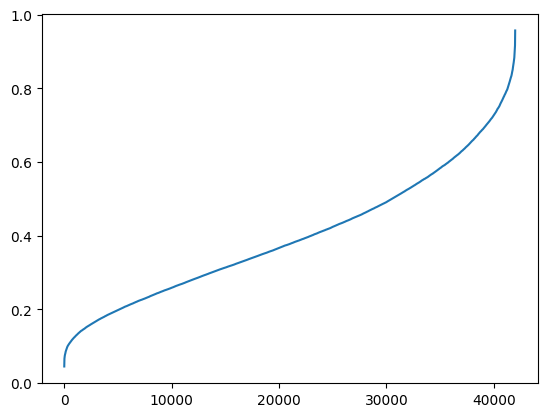

In [14]:
# prompt: find the max for every matrix of the type X_train[i]

max_values = np.sort([np.max(X_train[i]) for i in range(len(X_train))])
plt.plot(max_values)
plt.show()

In [10]:
import pandas as pd
import tensorflow as tf

model0 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = [50,50]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(5, activation='softmax'),
])

In [11]:
model0.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 2500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 2500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 500)                 │       1,250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 500)                 │           2,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 200)                 │         100,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 200)                 │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 200)                 │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │           1,005 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,395,505 (5.32 MB)

 Trainable params: 1,393,705 (5.32 MB)

 Non-trainable params: 1,800 (7.03 KB)

In [12]:
model0.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy'],
)

history = model0.fit(
    X_train, Y_train_onehot,
    batch_size = 32,
    epochs = 15,
    validation_data = (X_val, Y_valid_onehot)
)

Epoch 1/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.4273 - loss: 1.4410 - val_accuracy: 0.5108 - val_loss: 1.1684
Epoch 2/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5048 - loss: 1.1926 - val_accuracy: 0.5466 - val_loss: 1.1053
Epoch 3/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5382 - loss: 1.1451 - val_accuracy: 0.5604 - val_loss: 1.0809
Epoch 4/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5543 - loss: 1.1137 - val_accuracy: 0.5936 - val_loss: 1.0668
Epoch 5/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5739 - loss: 1.0709 - val_accuracy: 0.5820 - val_loss: 1.0759
Epoch 6/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5866 - loss: 1.0455 - val_accuracy: 0.5713 - val_loss: 1.0699
Epoch 7/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5944 - loss: 1.0265 - val_accuracy: 0.5819 - val_loss: 1.0773
Epoch 8/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6098 - loss: 0.9967 -

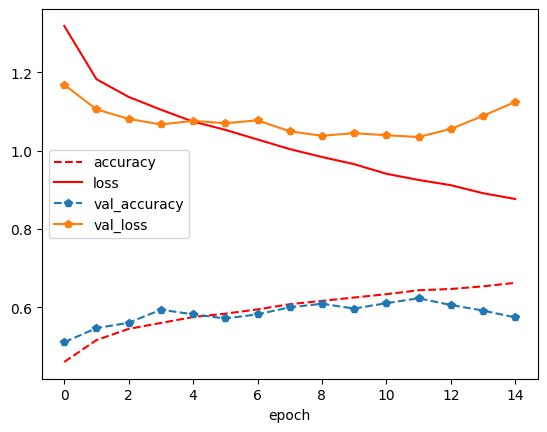

In [13]:
h = pd.DataFrame(history.history)
h.plot(xlabel = "epoch", style = ["r--","r-","p--","p-"])
plt.show()